<a href="https://colab.research.google.com/github/SuryakalaR/Deep-learning/blob/main/character_recognition_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8768 - loss: 0.4459
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9798 - loss: 0.0692
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9870 - loss: 0.0442
Test Accuracy : 98.46000075340271 %
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


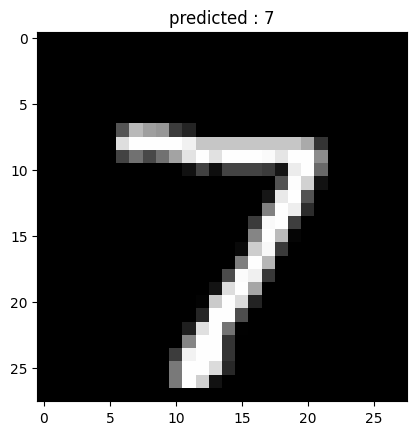

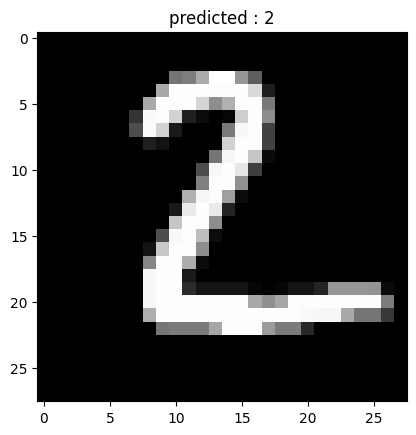

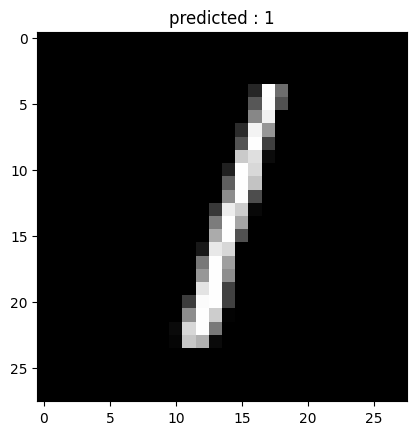

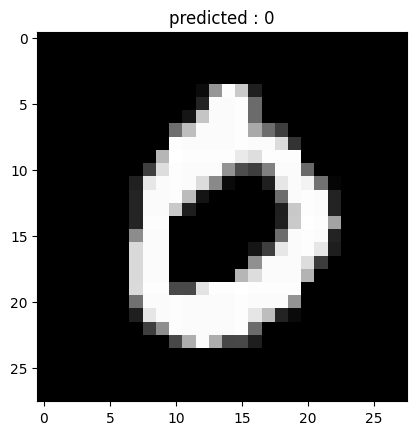

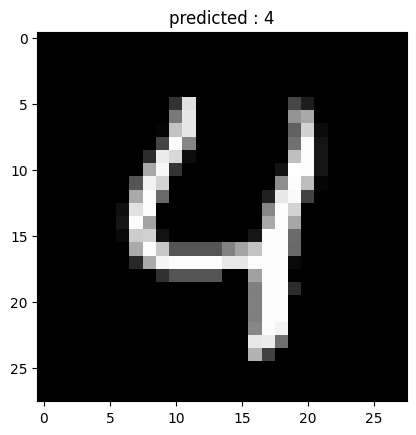

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1,28,28,1).astype('float32')/255.0
x_test = x_test.reshape(-1,28,28,1).astype('float32')/255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=128, verbose=1)

loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy :", accuracy * 100, "%")

predictions = model.predict(x_test[:5])
for i in range(5):
    plt.imshow(x_test[i].reshape(28,28), cmap="gray")
    plt.title(f"predicted : {np.argmax(predictions[i])}")
    plt.show()